In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 4].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [3]:
# sunset, sunrise 단위를 분으로 고치기
station["sunrise"] = ((station["sunrise"].astype("int64")// 100 * 60) + (station['sunrise'].astype("int64") % 100))
station["sunset"] = ((station['sunset'].astype("int64") // 100 * 60) + (station['sunset'].astype("int64") % 100))

# daytime 계산
station["daytime"] = station["sunset"] - station["sunrise"]

In [4]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,4,2012-01-01,63.0,47.0,55.0,4.0,28.0,43.0,10.0,0.0,448,1062,MD,0.0,0.0,29.79,30.48,8.0,35.0,8.2,2012,1,1,35.240051,52.786758,614,6,1,0,0,0,1
1,4,2012-01-02,60.0,37.0,48.5,-2.0,26.0,39.0,16.0,0.0,448,1062,MD,0.0,0.0,29.93,30.64,3.7,36.0,4.8,2012,1,2,41.243078,46.582626,614,0,0,0,0,0,1
2,4,2012-01-03,62.0,31.0,46.5,-4.0,26.0,39.0,18.0,0.0,448,1063,MD,0.0,0.0,29.70,30.48,3.1,17.0,4.2,2012,1,3,44.462235,44.671913,615,1,0,0,0,0,1
3,4,2012-01-04,73.0,41.0,57.0,6.0,39.0,47.0,8.0,0.0,448,1064,MD,0.0,0.0,29.55,30.28,1.3,35.0,2.2,2012,1,4,50.906282,58.252555,616,2,0,0,0,0,1
4,4,2012-01-05,70.0,44.0,57.0,6.0,41.0,49.0,8.0,0.0,448,1065,MD,0.0,0.0,29.51,30.24,0.4,31.0,1.8,2012,1,5,55.019917,58.660570,617,3,0,0,0,0,1


In [5]:
len(station)

1035

In [6]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 31 ( 3.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 0 ( 0.0 % )
sunset : 0 ( 0.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 7 ( 0.68 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 0 ( 0.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [7]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [8]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [9]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
102115,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,107,0
102116,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,108,0
102117,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,109,0
102118,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,110,0
102119,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,111,0


In [10]:
station['log1p_units'] = np.log1p(station.units)

In [11]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [12]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
102115,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,107
102116,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,108
102117,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,109
102118,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,110
102119,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,111


In [13]:
len(station)

102120

In [14]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [15]:
df2.to_csv("station4.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [16]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + snowfall + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + sunset + sunrise + daytime + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     936.1
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:17:45   Log-Likelihood:            -2.3663e+05
No. Observations:               98124   AIC:                         4.736e+05
Df Residuals:                   97946   BIC:                         4.753e+05
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      4.0229      4

### 2. OLS :  df1 (units) - 아웃라이어 제거 

In [17]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

968

In [18]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
101147,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,107,0
101148,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,108,0
101149,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,109,0
101150,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,110,0
101151,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,111,0


In [19]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + snowfall + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + sunset + sunrise + daytime + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(item_nbr)+ 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1377.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:18:23   Log-Likelihood:            -1.4552e+05
No. Observations:               97192   AIC:                         2.914e+05
Df Residuals:                   97014   BIC:                         2.931e+05
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]     -0.8886      1

R square 약간 상승했으나, conditional number도 두배 상승했다.

### 3. 변수변환 : df2 (log1p_units) 

In [20]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(snowfall) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) ', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     5325.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:18:55   Log-Likelihood:                 64212.
No. Observations:              101565   AIC:                        -1.281e+05
Df Residuals:                  101388   BIC:                        -1.264e+05
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야함

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [21]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

3630

In [22]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
98485,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,107,0.0
98486,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,108,0.0
98487,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,109,0.0
98488,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,110,0.0
98489,4,2014-10-31,76.0,56.0,66.0,-1.0,47.0,56.0,0.0,1.0,404,1065,RA BR,0.0,0.3,29.55,30.23,6.0,1.0,6.5,2014,10,31,50.321942,66.593017,661,4,0,2,1,0,0,8,111,0.0


In [23]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.128e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:19:53   Log-Likelihood:             1.4995e+05
No. Observations:               97954   AIC:                        -2.995e+05
Df Residuals:                   97780   BIC:                        -2.979e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [24]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:20:27   Log-Likelihood:             1.4995e+05
No. Observations:               97954   AIC:                        -2.995e+05
Df Residuals:                   97778   BIC:                        -2.979e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/sunset/sunrise/daytime/stnpressure/sealevel제거(VIF에 근거)

In [27]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:25:00   Log-Likelihood:             1.4994e+05
No. Observations:               97954   AIC:                        -2.995e+05
Df Residuals:                   97784   BIC:                        -2.979e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [32]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.168e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:26:25   Log-Likelihood:             1.4994e+05
No. Observations:               97954   AIC:                        -2.996e+05
Df Residuals:                   97786   BIC:                        -2.980e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/windchill제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [39]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:28:39   Log-Likelihood:             1.4994e+05
No. Observations:               97954   AIC:                        -2.996e+05
Df Residuals:                   97788   BIC:                        -2.980e+05
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

wetbulb, dewpoint추가로 지웠더니 conditional number 232까지 감소

### 6 - 4. 변수변환 : df2 (log1p_units) + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/relative_humility제거(VIF에 근거)  + 유의하지 않은 변수 제거 -> 정규화

In [46]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(item_nbr) + C(weekend) +0', data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     8474.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:31:37   Log-Likelihood:                 64461.
No. Observations:              102120   AIC:                        -1.287e+05
Df Residuals:                  102008   BIC:                        -1.276e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(item_nbr)[1]      -0.0016      0.004  

### F- 검정

In [47]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(item_nbr),111.0,16000.201688,144.145961,8691.103078,0.000000e+00
C(weekend),1.0,0.678769,0.678769,40.925535,1.588231e-10
Residual,102008.0,1691.849823,0.016585,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

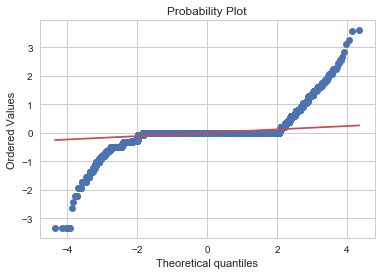

In [48]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',\
         'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'daytime', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,tmax
1,inf,tavg
2,inf,sunrise
3,inf,sunset
4,inf,tmin
5,inf,daytime
6,1.222575e+06,sealevel
7,1.219950e+06,stnpressure
8,1.484787e+04,windchill
9,4.161876e+03,wetbulb


tmax, sunrise, tavg, daytime, tmin, sunset, stnpressure, sealevel를 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [28]:
cols = ['dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,1363.292690,wetbulb
1,811.293094,dewpoint
2,793.123748,windchill
3,334.122056,relative_humility
4,77.116032,avgspeed
5,54.196246,heat
6,46.038393,resultspeed
7,4.006905,item_nbr
8,2.220678,cool
9,1.671223,preciptotal


### VIF : wetbulb 버리고 다시 

In [29]:
cols = ['dewpoint', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,1655.330740,dewpoint
1,448.329747,relative_humility
2,332.740096,windchill
3,39.353781,avgspeed
4,39.126051,cool
5,19.918795,resultspeed
6,12.205029,heat
7,4.066872,item_nbr
8,1.175264,preciptotal
9,1.108163,snowfall


### VIF : dewpoint 버리고 다시 

In [33]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,44.703801,windchill
1,39.301594,avgspeed
2,22.449701,relative_humility
3,19.865053,resultspeed
4,6.721285,cool
5,4.063722,item_nbr
6,1.936690,heat
7,1.154838,preciptotal
8,1.108087,snowfall


### VIF : windchill 버리고 다시 

In [35]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', \
        'relative_humility', 'avgspeed', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,34.051674,avgspeed
1,18.201593,resultspeed
2,8.736733,relative_humility
3,3.734891,item_nbr
4,3.000423,cool
5,1.841907,heat
6,1.113353,preciptotal
7,1.097464,snowfall


### VIF :  avgspeed 버리고 다시 

In [37]:
cols =  ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,6.604585,relative_humility
1,3.671400,item_nbr
2,2.997219,resultspeed
3,2.708013,cool
4,1.832033,heat
5,1.113256,preciptotal
6,1.097391,snowfall


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [49]:
from patsy import dmatrix

In [50]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [51]:
len(df2_1_X), len(df2_1_target)

(98490, 98490)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [52]:
formula = 'C(item_nbr) + C(weekend) +0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.96059497, 0.9481354 , 0.96381854, 0.93864204, 0.94238665,
       0.96067601, 0.95211242, 0.94286754, 0.94060527, 0.96603734])

In [56]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.44733061, 0.43169873, 0.44421615, 0.4240699 , 0.41666048,
       0.42448094, 0.4109005 , 0.38542581, 0.43634464, 0.42380067])

In [57]:
# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=1)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([0.12452981, 0.12579225, 0.13100545, 0.10768738, 0.11021899,
       0.10369292, 0.10465843, 0.09353992, 0.12971073, 0.10712693])

In [58]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.01, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([0.35868488, 0.33964435, 0.35163445, 0.32581585, 0.31835321,
       0.32560324, 0.31328585, 0.28244072, 0.34564397, 0.32830593])

### station 평균성능

In [59]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.9515876192009689,
 0.4244928433769742,
 0.11379628109506879,
 0.32894124493581195)